In [2]:
!pip install ucimlrepo

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
from ucimlrepo import fetch_ucirepo
letter_recognition = fetch_ucirepo(id=59)
X = letter_recognition.data.features
y = letter_recognition.data.targets
print(letter_recognition.metadata)
print(letter_recognition.variables)

{'uci_id': 59, 'name': 'Letter Recognition', 'repository_url': 'https://archive.ics.uci.edu/dataset/59/letter+recognition', 'data_url': 'https://archive.ics.uci.edu/static/public/59/data.csv', 'abstract': 'Database of character image features; try to identify the letter', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 20000, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['lettr'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1991, 'last_updated': 'Thu Sep 28 2023', 'dataset_doi': '10.24432/C5ZP40', 'creators': ['David Slate'], 'intro_paper': None, 'additional_info': {'summary': 'The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.  The character images were based on 20 different fonts and each letter within these 20 fonts wa

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
def create_data_splits(X_train, X_test, y_train, y_test, num_samples=10):
  samples = []
  for i in range(num_samples):
    X_train_inner, X_val, y_train_inner, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=i)
    samples.append((X_train_inner, X_val, y_train_inner, y_val, X_test, y_test))
  return samples
data_splits = create_data_splits(X_train, X_test, y_train, y_test)

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
def optimize_svm(X_train_inner, y_train_inner, param_grid):
  svm_model = SVC(kernel='linear')
  if isinstance(y_train_inner, pd.DataFrame):
    y_train_inner = y_train_inner.values.ravel()
  else:
    y_train_inner = y_train_inner.ravel()
  grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X_train_inner, y_train_inner)
  best_model = grid_search.best_estimator_
  best_params = grid_search.best_params_
  best_accuracy = grid_search.best_score_
  return best_model, best_params, best_accuracy
param_grid = {
  'kernel': ['linear', 'rbf'],
  'C': [0.1, 1, 10],
  'gamma': [0.001, 0.01, 0.1],
}
all_results = []
for i, data_split in enumerate(data_splits):
  X_train_inner, X_val, y_train_inner, y_val, X_test, y_test = data_split
  y_train_inner = y_train_inner.values.ravel() if isinstance(y_train_inner, pd.DataFrame) else y_train_inner.ravel()
  best_model, best_params, best_accuracy = optimize_svm(X_train_inner, y_train_inner, param_grid)
  all_results.append((i+1, best_model, best_params, best_accuracy))
print("Sample\tBest Model\tBest Parameters\tBest Accuracy")
for sample, model, params, accuracy in all_results:
  print(f"{sample}\t{model}\t{params}\t{accuracy:.4f}")


Sample	Best Model	Best Parameters	Best Accuracy
1	SVC(C=10, gamma=0.1)	{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}	0.9612
2	SVC(C=10, gamma=0.1)	{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}	0.9605
3	SVC(C=10, gamma=0.1)	{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}	0.9598
4	SVC(C=10, gamma=0.1)	{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}	0.9595
5	SVC(C=10, gamma=0.1)	{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}	0.9579
6	SVC(C=10, gamma=0.1)	{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}	0.9580
7	SVC(C=10, gamma=0.1)	{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}	0.9587
8	SVC(C=10, gamma=0.1)	{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}	0.9583
9	SVC(C=10, gamma=0.1)	{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}	0.9596
10	SVC(C=10, gamma=0.1)	{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}	0.9628


In [8]:
for sample, best_model, best_params, _ in all_results:
  _, _, _, _, X_test_sample, y_test_sample = data_splits[sample - 1]
  y_pred = best_model.predict(X_test_sample)
  from sklearn.metrics import accuracy_score, precision_score, recall_score
  accuracy = accuracy_score(y_test_sample, y_pred)
  precision = precision_score(y_test_sample, y_pred, average='weighted')
  recall = recall_score(y_test_sample, y_pred, average='weighted')
  print(f"Sample {sample} - Testing Accuracy: {accuracy:.4f}")
  print(f"Sample {sample} - Precision (weighted): {precision:.4f}")
  print(f"Sample {sample} - Recall (weighted): {recall:.4f}")

Sample 1 - Testing Accuracy: 0.9642
Sample 1 - Precision (weighted): 0.9648
Sample 1 - Recall (weighted): 0.9642
Sample 2 - Testing Accuracy: 0.9620
Sample 2 - Precision (weighted): 0.9626
Sample 2 - Recall (weighted): 0.9620
Sample 3 - Testing Accuracy: 0.9660
Sample 3 - Precision (weighted): 0.9666
Sample 3 - Recall (weighted): 0.9660
Sample 4 - Testing Accuracy: 0.9648
Sample 4 - Precision (weighted): 0.9654
Sample 4 - Recall (weighted): 0.9648
Sample 5 - Testing Accuracy: 0.9682
Sample 5 - Precision (weighted): 0.9684
Sample 5 - Recall (weighted): 0.9682
Sample 6 - Testing Accuracy: 0.9635
Sample 6 - Precision (weighted): 0.9638
Sample 6 - Recall (weighted): 0.9635
Sample 7 - Testing Accuracy: 0.9648
Sample 7 - Precision (weighted): 0.9653
Sample 7 - Recall (weighted): 0.9648
Sample 8 - Testing Accuracy: 0.9670
Sample 8 - Precision (weighted): 0.9672
Sample 8 - Recall (weighted): 0.9670
Sample 9 - Testing Accuracy: 0.9663
Sample 9 - Precision (weighted): 0.9668
Sample 9 - Recall (w

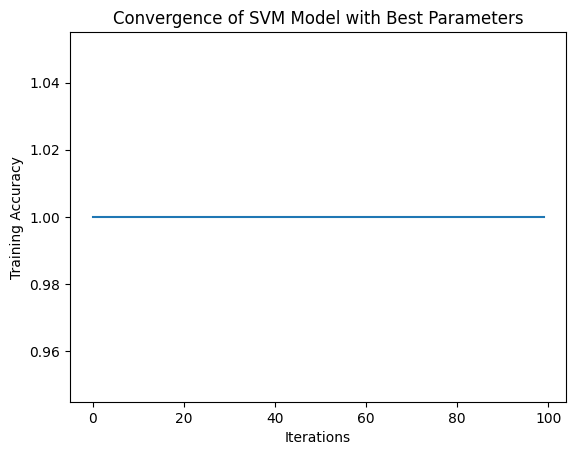

In [12]:
best_sample_index=4
import matplotlib.pyplot as plt
def plot_convergence(X_train_inner_best, y_train_inner_best, best_params, num_iterations=100):
  training_accuracy = []
  best_model_overall = SVC(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'])
  if isinstance(y_train_inner_best, pd.DataFrame):
    y_train_inner_best = y_train_inner_best.values.ravel()
  for i in range(num_iterations):
    best_model_overall.fit(X_train_inner_best, y_train_inner_best)
    y_pred = best_model_overall.predict(X_train_inner_best)
    training_accuracy.append(accuracy_score(y_train_inner_best, y_pred))
  plt.plot(range(num_iterations), training_accuracy)
  plt.xlabel("Iterations")
  plt.ylabel("Training Accuracy")
  plt.title("Convergence of SVM Model with Best Parameters")
  plt.show()
X_train_inner_best, X_val_best, y_train_inner_best, y_val_best, _, _ = data_splits[best_sample_index]
best_params = all_results[best_sample_index][2]
plot_convergence(X_train_inner_best, y_train_inner_best, best_params)